## Task 1
Create two classes of random points in 2D plain. Each class should contain 1000 points from the bivariate normal distribution:

the first with mean 
 and covariance matrix  
 
the second with mean 
 and covariance matrix  
 
Next generate corresponding target labels: 0 for the first class and 1 for the second class and visualize two classes: Two classes

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
mean1 = [0,1.5]
cov1 = [[1/3, 1/6], [1/6, 1/3]]
class1_points = np.random.multivariate_normal(mean1, cov1, 1000)
labels1 = np.zeros(1000)

mean2 = [2,0]
cov2 = [[2/3, 1/3], [1/3, 2/3]] 
class2_points = np.random.multivariate_normal(mean2, cov2, 1000)
labels2 = np.ones(1000)

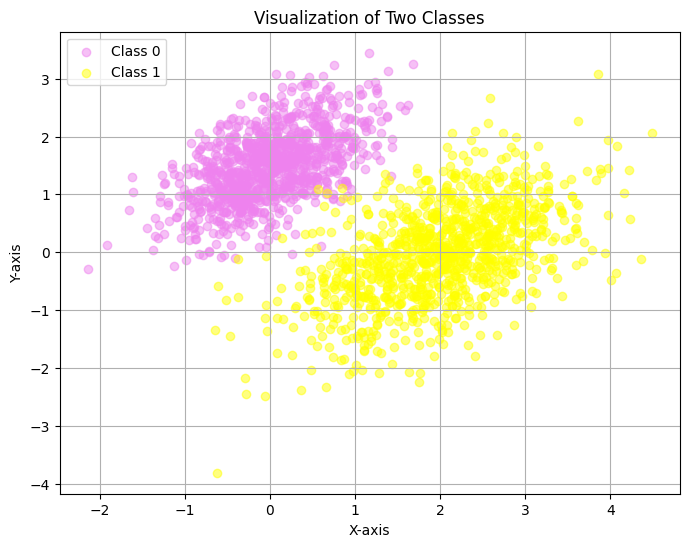

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(class1_points[:, 0], class1_points[:, 1], c='violet', label="Class 0", alpha=0.5)
plt.scatter(class2_points[:, 0], class2_points[:, 1], c='yellow', label="Class 1", alpha=0.5)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Visualization of Two Classes")
plt.legend()
plt.grid(True)

plt.show()

## Task 2
Create the linear classifier of the form 
, where 
 is tensorflow variable with initial value being random uniform vector of shape (2,1) and 
 is tensorflow variable with initial value equal 0. Using tensor operations define the forward pass function returning for input: 
.

In [30]:
# Combine the data
data_points = np.vstack([class1_points, class2_points])  # (2000, 2)
labels = np.concatenate([labels1, labels2])  # (2000,)

# TensorFlow variables
W = tf.Variable(tf.random.uniform([2, 1], minval=-1, maxval=1))  # Random uniform weight vector
b = tf.Variable(tf.zeros([1]))  # Bias initialized to 0

# Forward pass function
def forward_pass(x):
    return tf.matmul(x, W) + b

# Test the forward pass with the input data
input_data = tf.convert_to_tensor(data_points, dtype=tf.float32)
output = forward_pass(input_data)

## Task 3
For input: targets and predictions, define the mean squared error loss function using tensor operations.

In [37]:
import tensorflow as tf

# Assuming you have predictions from the forward pass and true labels (targets)

# Define the MSE loss function
def mean_squared_error_loss(targets, predictions):
    # Compute the squared differences
    squared_errors = tf.square(targets - predictions)
    
    # Calculate the mean of squared errors
    mse_loss = tf.reduce_mean(squared_errors)
    
    return mse_loss

# Example:
# Suppose `predictions` is the output from the forward pass (e.g., after running the model)
# And `targets` is the actual labels (e.g., labels from your dataset)
# Here, we simulate predictions for demonstration purposes:

# Simulated example (make sure to replace this with your actual predictions and targets)
targets = tf.convert_to_tensor(labels, dtype=tf.float32)  # actual labels
predictions = tf.convert_to_tensor(output, dtype=tf.float32)  # model's predictions

# Calculate the MSE loss
loss = mean_squared_error_loss(targets, predictions)

# Print the loss value
print("MSE Loss:", loss.numpy())

MSE Loss: 2.875888


## Task 4
For learning rate 0.1 define the training step function. The function for arguments: inputs, targets, should:

do forward pass, inside a gradient tape scope
retrieve the gradient of the loss with regard to weights
update the weights
return loss

In [38]:
def train_step(inputs, targets, learning_rate=0.1):
    with tf.GradientTape() as tape:
        # Forward pass: compute predictions
        predictions = forward_pass(inputs)
        
        # Compute the loss (Mean Squared Error)
        loss = mean_squared_error_loss(targets, predictions)
    
    # Get the gradients of the loss with respect to the trainable variables (W and b)
    gradients = tape.gradient(loss, [W, b])
    
    # Update weights using the computed gradients and the learning rate
    W.assign_sub(learning_rate * gradients[0])  # Update W
    b.assign_sub(learning_rate * gradients[1])  # Update b
    
    return loss

# Example data and labels (Replace with your actual data)
inputs_tensor = tf.convert_to_tensor([[1.0, 2.0], [3.0, 4.0]], dtype=tf.float32)  # Example inputs
targets_tensor = tf.convert_to_tensor([1.0, 2.0], dtype=tf.float32)  # Example targets

# Perform the training step
loss_value = train_step(inputs_tensor, targets_tensor, learning_rate=0.1)

# Print the loss after the training step
print("Loss after training step:", loss_value.numpy())

Loss after training step: 1.2460425


## Task 5
Perform the training step function 50 times.

In [39]:
# Perform 50 training steps
num_epochs = 50

# Training loop
for epoch in range(num_epochs):
    loss_value = train_step(inputs_tensor, targets_tensor, learning_rate=0.1)
    
    # Print the loss after every training step (epoch)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss_value.numpy()}")

Epoch 1/50, Loss: 4.469748020172119
Epoch 2/50, Loss: 19.571308135986328
Epoch 3/50, Loss: 90.1930160522461
Epoch 4/50, Loss: 420.3392333984375
Epoch 5/50, Loss: 1963.619873046875
Epoch 6/50, Loss: 9177.6484375
Epoch 7/50, Loss: 42899.359375
Epoch 8/50, Loss: 200530.1875
Epoch 9/50, Loss: 937369.25
Epoch 10/50, Loss: 4381694.0
Epoch 11/50, Loss: 20482052.0
Epoch 12/50, Loss: 95742544.0
Epoch 13/50, Loss: 447544768.0
Epoch 14/50, Loss: 2092029696.0
Epoch 15/50, Loss: 9779109888.0
Epoch 16/50, Loss: 45712056320.0
Epoch 17/50, Loss: 213679177728.0
Epoch 18/50, Loss: 998834962432.0
Epoch 19/50, Loss: 4669014802432.0
Epoch 20/50, Loss: 21825125875712.0
Epoch 21/50, Loss: 102020673437696.0
Epoch 22/50, Loss: 476891492384768.0
Epoch 23/50, Loss: 2229210701627392.0
Epoch 24/50, Loss: 1.0420356238016512e+16
Epoch 25/50, Loss: 4.870953334158131e+16
Epoch 26/50, Loss: 2.276908020698972e+17
Epoch 27/50, Loss: 1.0643315162947256e+18
Epoch 28/50, Loss: 4.975175216721297e+18
Epoch 29/50, Loss: 2.3256

## Task 6
Do predictions for the model: a given input point will be classified as “0” if its prediction value is below 0.5, and as “1” if it is above 0.5. Visualize model predictions:

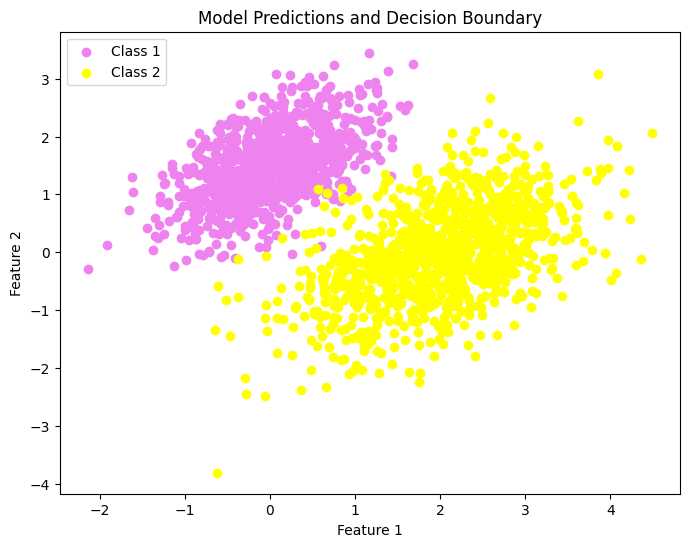

In [51]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to make predictions and classify based on threshold 0.5
def predict_class(inputs):
    predictions = forward_pass(inputs)  # Forward pass to get predictions
    return tf.cast(predictions > 0.5, tf.float32)  # Classify as 0 or 1 based on 0.5 threshold

# Convert TensorFlow tensors to NumPy arrays for min/max
inputs_numpy = inputs_tensor.numpy()

# Generate a grid of points for visualization
x_min, x_max = inputs_numpy[:, 0].min() - 1, inputs_numpy[:, 0].max() + 1
y_min, y_max = inputs_numpy[:, 1].min() - 1, inputs_numpy[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Convert grid points to tensor
grid_points_tensor = tf.convert_to_tensor(grid_points, dtype=tf.float32)

# Get predictions for the grid
predictions_grid = predict_class(grid_points_tensor).numpy().reshape(xx.shape)

# Visualize the data points and the predictions
plt.figure(figsize=(8, 6))

# Scatter plot of original data points
plt.scatter(class1_points[:, 0], class1_points[:, 1], color='violet', label='Class 1')
plt.scatter(class2_points[:, 0], class2_points[:, 1], color='yellow', label='Class 2')


# Label the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Model Predictions and Decision Boundary')

# Show plot
plt.show()


## Task 7
Add to the above plot a classifying line in the 2D plane
 
